In [3]:
import os
import numpy as np
import trimesh
import tensorflow as tf

import matplotlib 
import matplotlib.pyplot as plt


In [4]:
def load_point_cloud(file_path, num_points=4096):
    mesh = trimesh.load(file_path)

    # Si es una escena, combinar geometrías
    if isinstance(mesh, trimesh.Scene):
        mesh = trimesh.util.concatenate([geometry for geometry in mesh.geometry.values()])

    # Si es una nube de puntos
    if isinstance(mesh, trimesh.PointCloud):
        points = mesh.vertices  # Acceder directamente a los puntos
        if len(points) > num_points:
            indices = np.random.choice(len(points), num_points, replace=False)
            points = points[indices]
        elif len(points) < num_points:
            # Si hay menos puntos, repetir hasta completar
            points = np.tile(points, (num_points // len(points) + 1, 1))[:num_points]
        return points.astype(np.float32)

    # Si es una malla
    elif isinstance(mesh, trimesh.Trimesh):
        points = mesh.sample(num_points)
        return points.astype(np.float32)

    else:
        raise ValueError(f"El archivo {file_path} no es una malla ni una nube de puntos.")


def load_dataset(base_path, num_points=4096):
    data = []
    labels = []
    i = 0
    # Botellas (clase 0)
    for dataset in ['bottle']:
        folder_path = os.path.join(base_path, dataset)
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            file_path = os.path.join(subfolder_path,'models/model_normalized.obj') 
            if os.path.exists(file_path):
                try:
                    data.append(load_point_cloud(file_path, num_points))
                    labels.append(0)  # Clase 0: Botella
                    print(f"Added {dataset } num {i} ")
                    i+=1
                except Exception as e:
                    print(f"Error al cargar {file_path}: {e}")
    print(f"Categoria Bottle cargada")
    # car (clase 1)
    i=0
    for dataset in ['car']:
        folder_path = os.path.join(base_path, dataset)
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            file_path = os.path.join(subfolder_path,'models/model_normalized.obj') 
            if os.path.exists(file_path):
                try:
                    data.append(load_point_cloud(file_path, num_points))
                    labels.append(1)  # Clase 0: car
                    print(f"Added {dataset } num {i} ")
                    i+=1
                except Exception as e:
                    print(f"Error al cargar {file_path}: {e}")
    print(f"Categoria Car cargada")
    # laptop (clase 2)
    i=0
    for dataset in ['laptop']:
        folder_path = os.path.join(base_path, dataset)
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            file_path = os.path.join(subfolder_path,'models/model_normalized.obj') 
            if os.path.exists(file_path):
                try:
                    data.append(load_point_cloud(file_path, num_points))
                    labels.append(2)  # Clase 2: laptop
                    print(f"Added {dataset } num {i} ")
                    i+=1
                except Exception as e:
                    print(f"Error al cargar {file_path}: {e}")
    print(f"Categoria Laptop cargada")
    # skateboard (clase 3)
    i=0
    for dataset in ['skateboard']:
        folder_path = os.path.join(base_path, dataset)
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            file_path = os.path.join(subfolder_path,'models/model_normalized.obj') 
            if os.path.exists(file_path):
                try:
                    data.append(load_point_cloud(file_path, num_points))
                    labels.append(3)  # Clase 0: skateboard
                    print(f"Added {dataset } num {i} ")
                    i+=1
                except Exception as e:
                    print(f"Error al cargar {file_path}: {e}")
    print(f"Categoria Skateboard cargada")
    return np.array(data), np.array(labels)


# Configuración
DATA_PATH = "B:/MasterIE/datasets/ShapeNet"  
x_data, y_data = load_dataset(DATA_PATH, num_points=2048)
print("Shape de los datos:", x_data.shape)
print("Shape de las etiquetas:", y_data.shape)

Added bottle num 0 
Added bottle num 1 
Added bottle num 2 
Added bottle num 3 
Added bottle num 4 
Added bottle num 5 
Added bottle num 6 
Added bottle num 7 
Added bottle num 8 
Added bottle num 9 
Added bottle num 10 
Added bottle num 11 
Added bottle num 12 
Added bottle num 13 
Added bottle num 14 
Added bottle num 15 
Added bottle num 16 
Added bottle num 17 
Added bottle num 18 
Added bottle num 19 
Added bottle num 20 
Added bottle num 21 
Added bottle num 22 
Added bottle num 23 
Added bottle num 24 
Added bottle num 25 
Added bottle num 26 
Added bottle num 27 
Added bottle num 28 
Added bottle num 29 
Added bottle num 30 
Added bottle num 31 
Added bottle num 32 
Added bottle num 33 
Added bottle num 34 
Added bottle num 35 
Added bottle num 36 
Added bottle num 37 
Added bottle num 38 
Added bottle num 39 
Added bottle num 40 
Added bottle num 41 
Added bottle num 42 
Added bottle num 43 
Added bottle num 44 
Added bottle num 45 
Added bottle num 46 
Added bottle num 47 
Ad

Distribucion de clases antes del equilibrio: {0: 498, 1: 553, 2: 460, 3: 152}


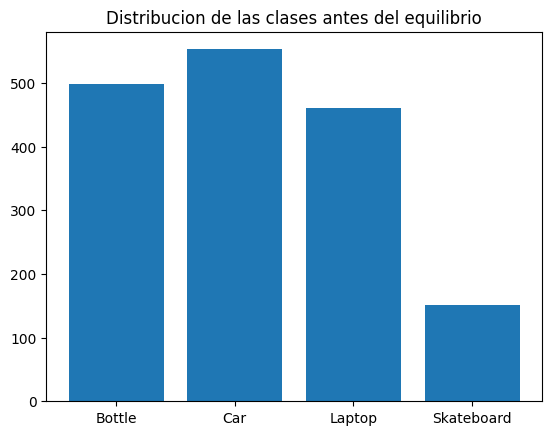

In [5]:
unique, counts = np.unique(y_data, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribucion de clases antes del equilibrio:",class_distribution)
plt.bar(class_distribution.keys(), class_distribution.values(), tick_label=['Bottle', 'Car', 'Laptop', 'Skateboard'])
plt.title("Distribucion de las clases antes del equilibrio")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

print("Shape de x_train:", x_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de x_test:", x_test.shape)
print("Shape de y_test:", y_test.shape)

Shape de x_train: (1330, 1024, 3)
Shape de y_train: (1330,)
Shape de x_test: (333, 1024, 3)
Shape de y_test: (333,)


Distribucion de clases antes del equilibrio: {0: 122, 1: 122, 2: 122, 3: 122}


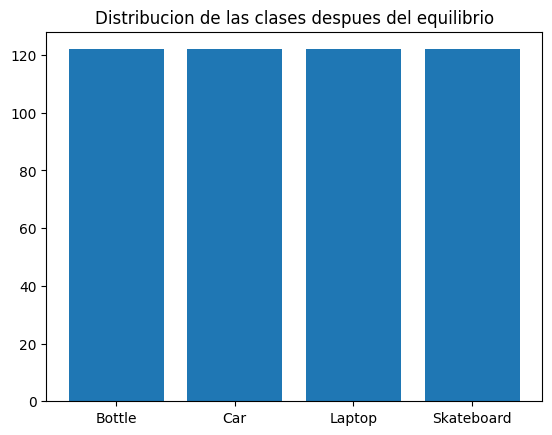

In [7]:
from sklearn.utils import resample

def balance_dataset(x, y):
    classes = np.unique(y)
    x_balanced = []
    y_balanced = []

    # Encontrar el tamaño mínimo
    min_samples = min([np.sum(y == c) for c in classes])

    # Reequilibrar cada clase
    for c in classes:
        x_class = x[y == c]
        y_class = y[y == c]
        
        # Submuestrear la clase al tamaño mínimo
        x_resampled, y_resampled = resample(x_class, y_class, replace=False, n_samples=min_samples, random_state=42)
        x_balanced.append(x_resampled)
        y_balanced.append(y_resampled)
    
    return np.vstack(x_balanced), np.hstack(y_balanced)

# Aplicar submuestreo
x_train_balanced, y_train_balanced = balance_dataset(x_train, y_train)
unique, counts = np.unique(y_train_balanced, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribucion de clases antes del equilibrio:",class_distribution)
plt.bar(class_distribution.keys(), class_distribution.values(), tick_label=['Bottle', 'Car', 'Laptop', 'Skateboard'])
plt.title("Distribucion de las clases despues del equilibrio")
plt.show()

In [8]:


from tensorflow import keras
from tensorflow.keras import layers


def pointNet_buena(num_clases=4, num_points=1024):
    inputs = keras.Input(shape=(num_points,3))
    
    #expandir dimensiones para aplicar convs 2D 
    x = layers.Reshape((num_points,3,1))(inputs)
    x = layers.Conv2D(64, (1,3), activation='relu', padding='valid')(x)
    x = layers.Conv2D(64, (1,1), activation='relu', padding='valid')(x)
    x = layers.Conv2D(64, (1,1), activation='relu', padding='valid')(x)
    x = layers.Conv2D(128, (1,1), activation='relu', padding='valid')(x)
    x = layers.Conv2D(1024, (1,1), activation='relu', padding='valid')(x)
    x = layers.Dropout(0.15)(x)
    #maxpooling global
    x= layers.GlobalMaxPooling2D()(x)
    #capas conectadas completamente
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.15)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.7)(x)
    outputs = layers.Dense(num_clases, activation='softmax')(x)
    model = keras.Model(inputs, outputs,name="PointNet")
    return model

def pointnet_oficial(num_points=2048, num_classes=4):
    inputs = tf.keras.Input(shape=(num_points, 3))
    
    # Transformación de Entrada (T-Net)
    x = tf.keras.layers.Conv1D(64, 1, activation='relu')(inputs)
    x = tf.keras.layers.Conv1D(128, 1, activation='relu')(x)
    x = tf.keras.layers.Conv1D(1024, 1, activation='relu')(x)
    x = tf.keras.layers.GlobalMaxPooling1D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    t_net = tf.keras.layers.Dense(9, kernel_initializer='zeros', bias_initializer='zeros')(x)
    t_net = tf.keras.layers.Reshape((3, 3))(t_net)
    
    # Aplicar la transformación a los puntos
    transformed_inputs = tf.linalg.matmul(inputs, t_net)
    
    # MLP Compartido (Perceptrón Multicapa)
    x = tf.keras.layers.Conv1D(64, 1, activation='relu')(transformed_inputs)
    x = tf.keras.layers.Conv1D(64, 1, activation='relu')(x)
    
    # Transformación de Características (T-Net para características)
    x_t = tf.keras.layers.Conv1D(64, 1, activation='relu')(x)
    x_t = tf.keras.layers.Conv1D(128, 1, activation='relu')(x_t)
    x_t = tf.keras.layers.Conv1D(1024, 1, activation='relu')(x_t)
    x_t = tf.keras.layers.GlobalMaxPooling1D()(x_t)
    x_t = tf.keras.layers.Dense(512, activation='relu')(x_t)
    x_t = tf.keras.layers.Dense(256, activation='relu')(x_t)
    f_t_net = tf.keras.layers.Dense(64 * 64, kernel_initializer='zeros')(x_t)
    f_t_net = tf.keras.layers.Reshape((64, 64))(f_t_net)
    
    # Aplicar la transformación de características
    x = tf.linalg.matmul(x, f_t_net)
    
    # MLP Compartido (Continuación)
    x = tf.keras.layers.Conv1D(64, 1, activation='relu')(x)
    x = tf.keras.layers.Conv1D(128, 1, activation='relu')(x)
    x = tf.keras.layers.Conv1D(1024, 1, activation='relu')(x)
    
    # Agregación Global (Max Pooling)
    x = tf.keras.layers.GlobalMaxPooling1D()(x)
    
    # MLP Global (Clasificación)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    # Definir el modelo
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Compilar el modelo
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# model = pointnet_model()
model = pointNet_buena()
#model = pointnet_oficial()
model.summary()



Model: "PointNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 3)]         0         
                                                                 
 reshape (Reshape)           (None, 1024, 3, 1)        0         
                                                                 
 conv2d (Conv2D)             (None, 1024, 1, 64)       256       
                                                                 
 conv2d_1 (Conv2D)           (None, 1024, 1, 64)       4160      
                                                                 
 conv2d_2 (Conv2D)           (None, 1024, 1, 64)       4160      
                                                                 
 conv2d_3 (Conv2D)           (None, 1024, 1, 128)      8320      
                                                                 
 conv2d_4 (Conv2D)           (None, 1024, 1, 1024)     132

In [9]:
# SAVING THE TRAINED MODEL
checkpoint_path = "C:/Users/Luis/Desktop/pointnet/model_trained"
checkpoint_dir= os.path.dirname(checkpoint_path)

#callback
batch_size=32
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq=2*batch_size,
                                                 verbose=1)

In [10]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history = model.fit(x_train_balanced,
          y_train_balanced,
          epochs=50,
          batch_size=32,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/50
13/13 [==============================] - 9s 138ms/step - loss: 0.5404 - accuracy: 0.8154 - val_loss: 1.5153 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 1s 96ms/step - loss: 0.2092 - accuracy: 0.9462 - val_loss: 1.5801 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 1s 95ms/step - loss: 0.1546 - accuracy: 0.9667 - val_loss: 1.6081 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 1s 95ms/step - loss: 0.1044 - accuracy: 0.9667 - val_loss: 1.6125 - val_accuracy: 0.0000e+00
Epoch 5/50
11/13 [========================>.....] - ETA: 0s - loss: 0.0591 - accuracy: 0.9858
Epoch 5: saving model to C:/Users/Luis/Desktop/pointnet\model_trained
13/13 [==============================] - 1s 112ms/step - loss: 0.0761 - accuracy: 0.9821 - val_loss: 1.5959 - val_accuracy: 0.0000e+00
Epoch 6/50
13/13 [==============================] - 1s 97ms/step - loss: 0.1691 - accuracy: 0.9564 - val_loss: 1.6732 - 

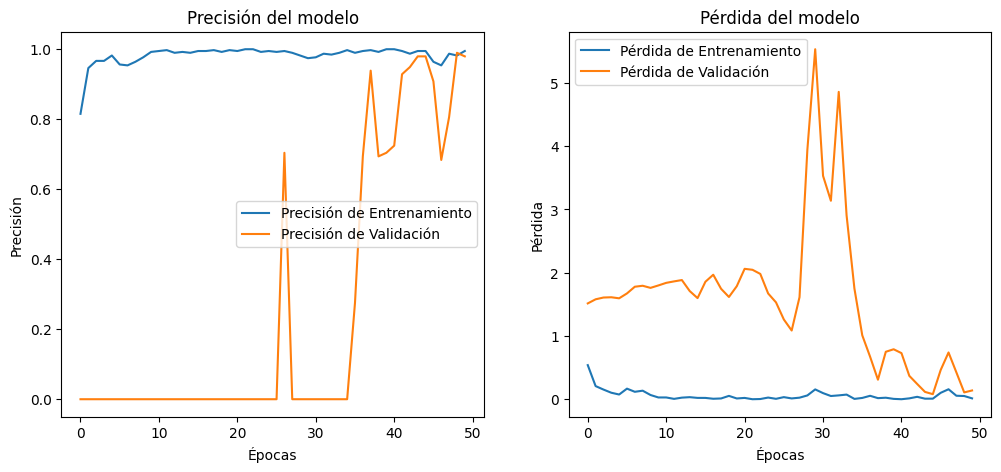

In [11]:
#import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use('Agg')  # Usa TkAgg para gráficos interactivos

plt.figure(figsize=(12, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


1/1 [==============================] - 1s 516ms/step


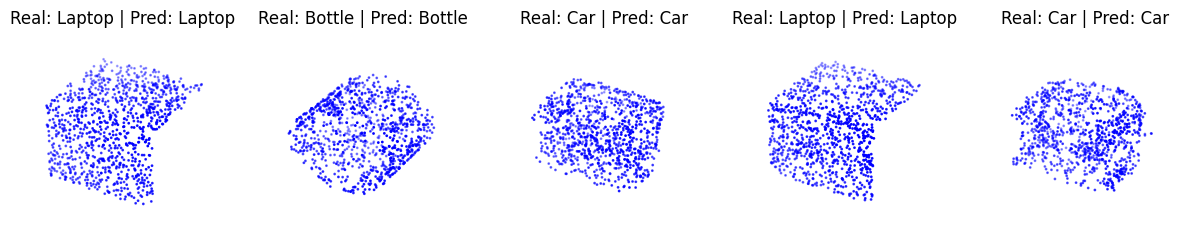

In [12]:
import random
num_samples = 5
indices = random.sample(range(len(x_train)), num_samples)
x_test = x_train[indices]
y_test = y_train[indices]
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

fig = plt.figure(figsize=(15, 15))
for i in range(num_samples):
    ax = fig.add_subplot(1, num_samples, i + 1, projection='3d')
    ax.scatter(x_test[i][:, 0], x_test[i][:, 1], x_test[i][:, 2], s=1, c='b')
    class_names = ['Bottle', 'Car', 'Laptop', 'Skateboard']
    ax.set_title(f"Real: {class_names[y_test[i]]} | Pred: {class_names[predicted_classes[i]]}")
    ax.axis("off")

plt.show()
